In [45]:
#交叉验证
from sklearn.model_selection import cross_val_predict,train_test_split
import pandas as pd
#导入决策树模型
from sklearn.tree import DecisionTreeClassifier,plot_tree
#画图工具
import matplotlib.pyplot as plt
#新的库: LavelEncoder 将文本变成数字的
from sklearn.preprocessing import LabelEncoder
#评估模型好还是坏
from sklearn.metrics import accuracy_score
#导入数据集 鸢尾花数据集
from sklearn.datasets import load_iris

In [46]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [47]:
#提取特征和标签
X = iris.data
y = iris.target

In [48]:
#划分数据集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [49]:
# 建立决策树模型  对于数据量比较大的  通常来说需要做预剪枝的操作
# 选择一个合适的层数  不让模型继续划分下去
# 如何找到最合适效果最好的层数呢？
# 使用交叉验证 来判断一下 最佳深度是哪个?   1-10之间
import numpy as np
scores= []
depths = range(1,11)
for i in depths:
    #增加一个参数信息 max_depth
    model = DecisionTreeClassifier(max_depth=i,random_state=42)
    score = np.mean(cross_val_predict(model,X_train,y_train,cv=5))
    scores.append(score)

#print(scores)
beat_depth = depths[np.argmax(scores)]
print('最佳深度:',beat_depth)

最佳深度: 3


In [50]:
#搭建模型训练
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Text(0.5, 1.0, '鸢尾花决策树')

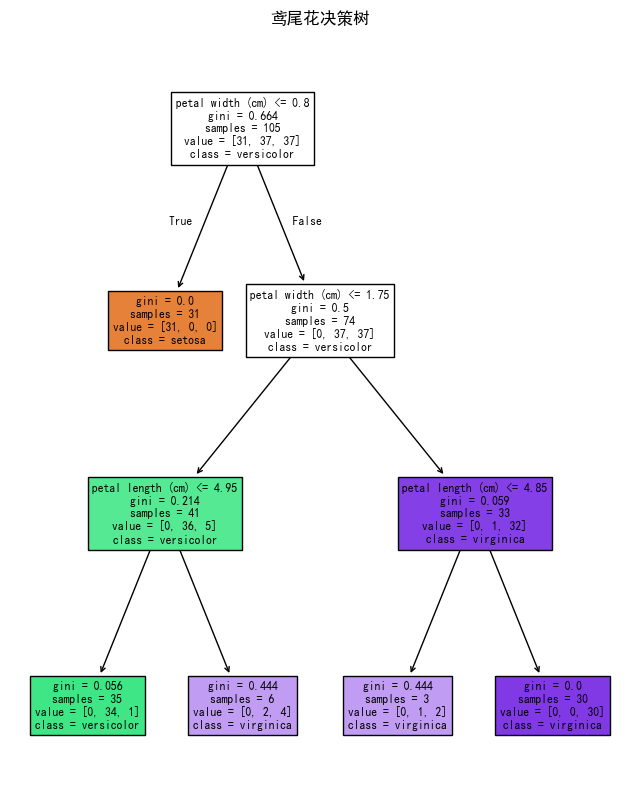

In [51]:
#可视化决策树
plt.rcParams['font.sans-serif'] = ['SimHei']  #用来正常显示中文标签"
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号"
plt.figure(figsize=(8,10))
# feature_names列表的顺序重要吗 非常重要 按照训练的时候的顺序 保持一致
# class_names 列表的顺序 怎么看？    如果你的0表示拒绝 1表示批准 那么就要写['拒绝','批准']
plot_tree(model,filled=True,feature_names=iris.feature_names,class_names=iris.target_names)
plt.title('鸢尾花决策树')

In [52]:
#评估模型
y_pred = model.predict(X_test)
accu = accuracy_score(y_test,y_pred)
print('最终模型的准确率是:',accu)

最终模型的准确率是: 1.0
